# Problema 18
## 18)

Generemos un prisma rectangular de lados $2a, 2b$ y $2c$ centrado en el origen y con sus ejes de inercia coincidentes con los ejes cartesianos. Para ello, tiraremos $n = 1000$ partículas (de masa $m = 1$ por simpleza) con $X, Y , Z \sim U(-i,i), i = a,b,c$ :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from numpy import linalg as LA

## Propongo lados $a = 3$ , $b = 2$ , $c = 1$

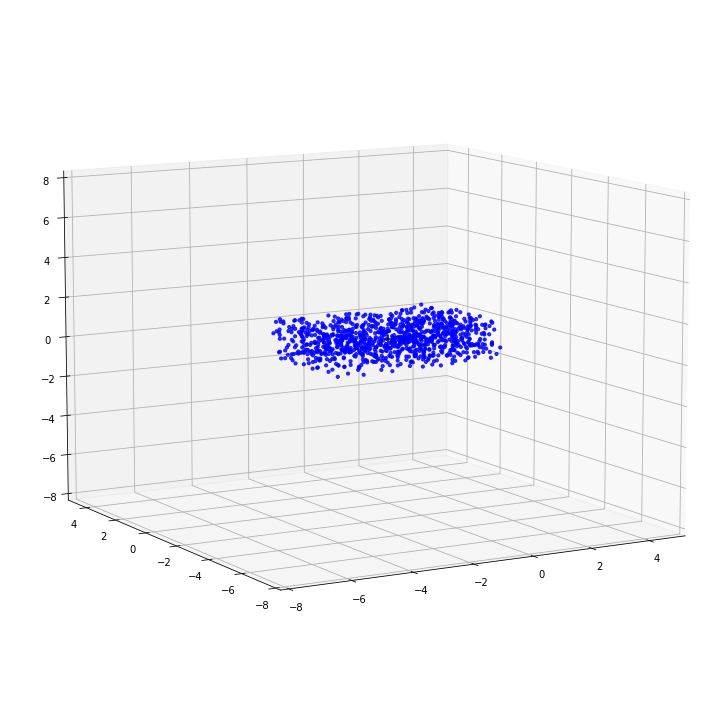

In [6]:
n = 1000 #Cantidad de partículas

a = 3
b = 2
c = 1

alt = 10 #parámetros para la visualización 3D
acit = -120

x = np.random.uniform(-a,a,n)
y = np.random.uniform(-b,b,n)
z = np.random.uniform(-c,c,n)
#z = np.zeros(n)

xr = np.empty(n)
yr = np.empty(n)
zr = np.empty(n)

#plot 3-D

aux = max((a,b,c))

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d')    
ax.scatter3D(x, y, z,s=10,color='b',alpha=0.8)
ax.scatter3D(0,0,0,s=50,c='k',marker='+')
plt.xlim(-aux-5,aux+2)
plt.ylim(-aux-5,aux+2)
#ax.set_frame_on(False)
ax.set_zlim(-aux-5,aux+5);
ax.view_init(elev=alt, azim=acit)

plt.show()
plt.close()

Ahora lo quiero rotar tal que ninguno de sus ejes coincida con los cartesianos. Utilizaremos la *fórmula de Euler-Rodrigues* para rotar el cuerpo rígido: Debo definir un eje de rotación $\vec{k}$ y la cantidad de grados $\phi$ a rotar.

*Dejo la cita: https://es.wikipedia.org/wiki/F%C3%B3rmula_de_Euler-Rodrigues *

Pidamos $\vec{k} = (1,1,1)$ y $\phi = 45º$ :

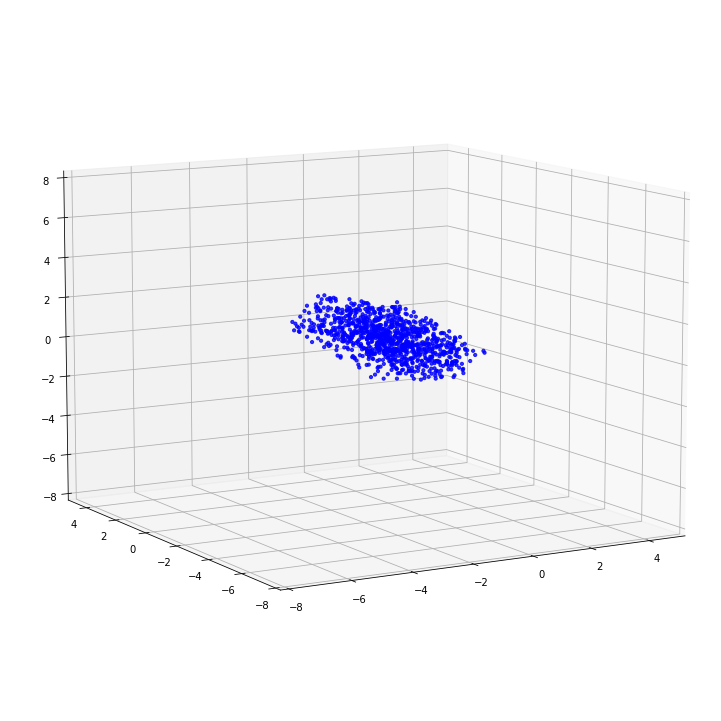

In [7]:
#Ahora, lo rotamos usando la matriz de rotación de Euler - Rodrigues (busco A^2 + B^2 + C^2 + D^2 = 1):

k = (1,1,1)
phi = np.pi/4

K = LA.norm(k)

kx = k[0]/K
ky = k[1]/K
kz = k[2]/K

A = np.cos(phi/2)
B = kx*np.sin(phi/2)
C = ky*np.sin(phi/2)
D = kz*np.sin(phi/2)

AA = A*A
BB = B*B
CC = C*C
DD = D*D

#convertimos al vector (x,y,z) al (xr,yr,zr) rotado:

for i in range(len(x)):
    xr[i] = (AA+BB-CC-DD)*x[i] + 2*(B*C-A*D)*y[i] + 2*(B*D+A*C)*z[i]
    yr[i] = 2*(B*C+A*D)*x[i] + (AA+CC-BB-DD)*y[i] + 2*(C*D-A*B)*z[i]
    zr[i] = 2*(B*D-A*C)*x[i] + 2*(C*D+A*B)*y[i] + (AA+DD-BB-CC)*z[i]

#plot 3-D

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection='3d')    
ax.scatter3D(xr, yr, zr,s=10,color='b',alpha=0.8)
ax.scatter3D(0,0,0,s=50,c='k',marker='+')
plt.xlim(-aux-5,aux+2)
plt.ylim(-aux-5,aux+2)
#ax.set_frame_on(False)
ax.set_zlim(-aux-5,aux+5);
ax.view_init(elev=alt, azim=acit)

plt.show()
plt.close()

Para corroborar que se haya mantenido la condición de cuerpo rígido y la rotación haya sido efectuada correctamente, obtengamos 2 pts al azar y midamos su distancia antes y después de la rotación:

In [10]:
#¿Se conserva la norma?
i = 0
j = n-1

print(f'Distancia entre 2 pts arbitrarios = {LA.norm((x[i]-x[j],y[i]-y[j],z[i]-z[j])):.3f}')
print(f'Distancia después de rotarlos = {LA.norm((xr[i]-xr[j],yr[i]-yr[j],zr[i]-zr[j])):.3f}')

Distancia entre 2 pts arbitrarios = 3.614
Distancia después de rotarlos = 3.614


Una vez rotado, calculemos el tensor de inercia de este conjunto de partículas antes y después de la rotación. Y comparemos los autovalores y autovectores correspondientes a cada caso: 

In [14]:
#Tensor sin rot:
Ixx = 0
for i in range(len(x)):
    Ixx += y[i]**2 + z[i]**2

Iyy = 0
for i in range(len(x)):
    Iyy += x[i]**2 + z[i]**2

Izz = 0
for i in range(len(x)):
    Izz += x[i]**2 + y[i]**2

#Los otros 3 elementos (I es simétrica):
Ixy = 0
for i in range(len(x)):
    Ixy += -x[i]*y[i]

Ixz = 0
for i in range(len(x)):
    Ixz += -x[i]*z[i]

Iyz = 0
for i in range(len(x)):
    Iyz += -y[i]*z[i]

I = np.matrix([[Ixx, Ixy, Ixz],[Ixy, Iyy, Iyz],[Ixz, Iyz, Izz]]) #I es uan matriz 3x3
print(f'Tensor de inercia previo a la rotación: \n {I}')

w,v = np.linalg.eig(I) #devuelve 1º los autovalores y luego los autovectores normalizados
print(f'Autovalores: \n {w} \nAutovectoress: \n {v}')

Tensor de inercia previo a la rotación: 
 [[1660.27398799   -9.64961498   33.67725961]
 [  -9.64961498 3407.78712752   16.42569618]
 [  33.67725961   16.42569618 4381.4605111 ]]
Autovalores: 
 [1659.80173159 4382.15009473 3407.5698003 ] 
Autovectoress: 
 [[-0.99990715 -0.01231082 -0.00584287]
 [-0.00563649 -0.01673232  0.99984412]
 [ 0.01240667 -0.99978421 -0.01666138]]


Vemos que las componentes fuera de la diagonal son 2 órdenes de magnitud menor que los de la diagonal, y los autovectores devueltos se acercan bastante a los vectores base cartesianos, que es lo que pedíamos en un principio.

In [15]:
#Post-rot:
Ixx = 0
for i in range(len(xr)):
    Ixx += yr[i]**2 + zr[i]**2

Iyy = 0
for i in range(len(xr)):
    Iyy += xr[i]**2 + zr[i]**2

Izz = 0
for i in range(len(xr)):
    Izz += xr[i]**2 + yr[i]**2

#Los otros 3 elementos (I es simétrica):
Ixy = 0
for i in range(len(xr)):
    Ixy += -xr[i]*yr[i]

Ixz = 0
for i in range(len(xr)):
    Ixz += -xr[i]*zr[i]

Iyz = 0
for i in range(len(xr)):
    Iyz += -yr[i]*zr[i]

I = np.matrix([[Ixx, Ixy, Ixz],[Ixy, Iyy, Iyz],[Ixz, Iyz, Izz]]) #I es uan matriz 3x3
print(f'Tensor de inercia post-rotación: \n {I}')

w,v = np.linalg.eig(I) #devuelve 1º los autovalores y luego los autovectores normalizados
print(f'Autovalores: \n {w} \nAutovectores: \n{v}')

Tensor de inercia post-rotación: 
 [[2552.35101931 -860.67188157  844.95652634]
 [-860.67188157 3027.8649792    56.16869604]
 [ 844.95652634   56.16869604 3869.30562811]]
Autovalores: 
 [1659.80173159 4382.15009473 3407.5698003 ] 
Autovectores: 
[[ 0.79663606  0.51047984 -0.32369942]
 [ 0.51422202 -0.29085727  0.80683193]
 [-0.31772111  0.80920479  0.49420736]]


Para el cuerpo rotado, los coeficientes del tensor que no están en la diagonal ahora son más grandes (más notorio en los que corresponden a la dirección x) y la matriz de autovectores ya no se parece a la identidad.